# TecknoHacks : Data Science Tasks

## Task 1 - Email SPAM DETECTION

## Author : Mostafa Magdy Hassan

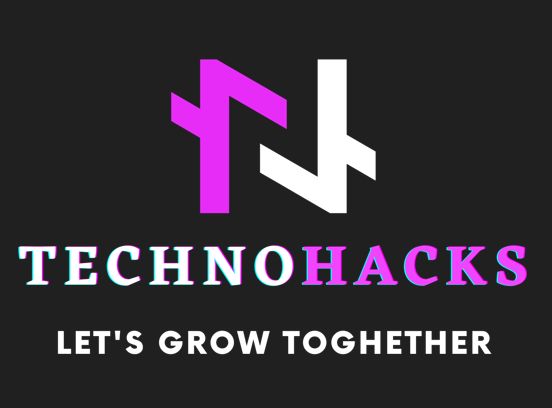

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import plotly
import plotly.express as px
# Warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay



# Text Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load and Explore Dataset

In [2]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dataset, *['v1'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dataset, *['Unnamed: 4'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dataset, *['v1', 'Unnamed: 4'], **{})
chart

In [3]:
df = dataset.copy()
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Drop the extra columns and rename columns

df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["Category", "Text"]

In [5]:
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Category'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Text'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['Category', 'Text'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['index', 'Category'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['index', 'Text'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['index', 'count()', 'Category'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'count()', 'Text'], **{})
chart

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [8]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [23]:
# Import necessary libraries
import plotly.express as px

# Create a pie chart using Plotly Express
fig = px.pie(df, names='Category', title='Distribution of Spam vs. Ham',
             labels={'Category': 'Spam vs Ham'},
             color_discrete_sequence=['#1f77b4', '#ff7f0e'],
             template='plotly_white')

# Customize the chart labels, colors, and template
# 'df' should represent your DataFrame containing the data

# Set the column 'Category' from the DataFrame as the pie chart labels
# Customize the chart title and axis labels
# Use color_discrete_sequence to specify colors for 'Spam' and 'Ham' categories
# Choose a template for the chart (e.g., 'plotly_white' for a white background)

# Show the chart
fig.show()


NOTE !!!
- Because the distribution between 2 types of messages is high:
    - when we split our dataset into train and test or we use cross validation, we will have to use stratified sampling

In [10]:
Top_messages = df.groupby("Text")["Category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(15)
display(Top_messages)

,len,amax
Text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


So. People are really busy it seems. "Sorry, i'll call later" tops the ham message list with 30 counts with "I cant pick the phone right now. Pls send a message" comes second with 12 counts.

Theres a quite lot of Ok , Okie and Ok. English mostly not formal

while on spam messages includes prize - free money $ and £ - please call - customer - loan - pounds - links - click here - claim

In [11]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',1)

In [12]:
df.head(20)

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [13]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df

,Category,Text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [14]:
spam_messages = df[df["Category"] == 1]["Text"]
ham_messages = df[df["Category"] == 0]["Text"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha().

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words

def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

# The apply method is used to apply the extractSpamWords function to each spam message and the extractHamWords function
# to each ham message. This processes the entire dataset of messages, extracting relevant words and adding them
# to the corresponding lists.
spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: Text, Length: 4825, dtype: object

In [16]:
# Top 20 spam words

spam_words = np.array(spam_words)
print("Top 20 Spam words are :\n")
pd.Series(spam_words).value_counts().head(20)

Top 20 Spam words are :



call       346
free       219
txt        156
u          144
ur         144
mobile     123
text       121
stop       114
claim      113
reply      104
prize      92 
get        84 
new        69 
send       68 
nokia      65 
cash       62 
urgent     62 
win        60 
contact    56 
service    55 
dtype: int64

In [ ]:
# Top 20 Ham words

ham_words = np.array(ham_words)
print("Top 20 Ham words are :\n")
pd.Series(ham_words).value_counts().head(20)

Top 20 Ham words are :



u        989
gt       318
lt       316
get      301
ok       261
go       248
got      242
ur       237
know     236
like     231
call     230
good     229
come     227
time     197
love     191
day      185
going    169
one      167
want     163
lor      162
Name: count, dtype: int64

In [17]:
df["Message Length"] = df["Text"].apply(len)
df["Message Length"].describe()

count    5572.000000
mean     80.118808  
std      59.690841  
min      2.000000   
25%      36.000000  
50%      61.000000  
75%      121.000000 
max      910.000000 
Name: Message Length, dtype: float64

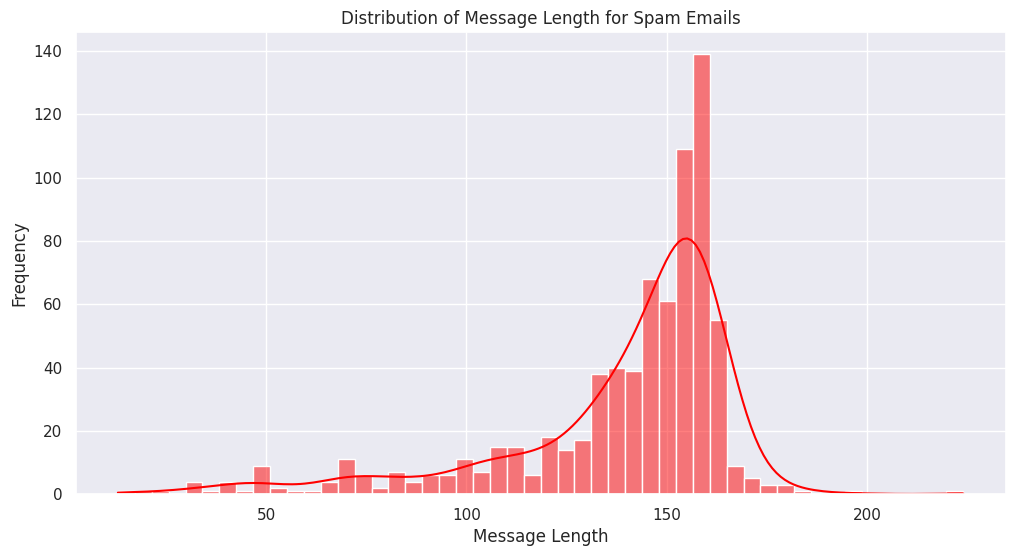

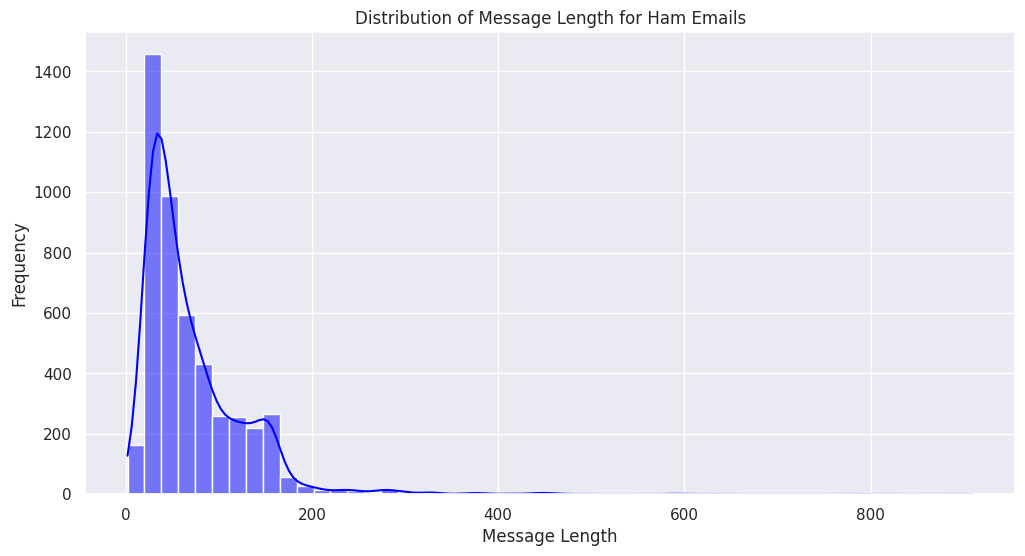

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot distribution for 'spam' category
sns.histplot(data=df[df['Category'] == 1], x='Message Length', bins=50, kde=True, color='red')
plt.title('Distribution of Message Length for Spam Emails')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot distribution for 'ham' category
sns.histplot(data=df[df['Category'] == 0], x='Message Length', bins=50, kde=True, color='blue')
plt.title('Distribution of Message Length for Ham Emails')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


In [27]:
mean_spam_length = df[df['Category'] == 1]['Message Length'].mean()

mean_ham_length = df[df['Category'] == 0]['Message Length'].mean()

print(f"Mean Message Length for Spam Category: {mean_spam_length:.2f}")
print(f"Mean Message Length for Ham Category: {mean_ham_length:.2f}")

Mean Message Length for Spam Category: 138.87
Mean Message Length for Ham Category: 71.02


### Remove Stop words and Punctuations

In [20]:
# reduce words to their base or root form using SnowballStemmer
stemmer = SnowballStemmer("english")

def Clean_Text(df):

    df = df.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in df.split() if word.lower() not in stopwords.words("english")]

    return " ".join(words)

df["Text"] = df["Text"].apply(Clean_Text)
df.head(20)

,Category,Text,Message Length
0,0,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkts 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61
5,1,freemsg hey darl 3 week word back id like fun still tb ok xxx std chgs send å£150 rcv,148
6,0,even brother like speak treat like aid patent,77
7,0,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun,160
8,1,winner valu network custom select receivea å£900 prize reward claim call 09061701461 claim code kl341 valid 12 hour,158
9,1,mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030,154


### Train Test Split

In [28]:
tfidf = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = tfidf.fit_transform(df["Text"])
features.shape

(5572, 7903)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, df["Category"],
                                                    stratify = df["Category"], test_size = 0.2, random_state= 365 )

In [30]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

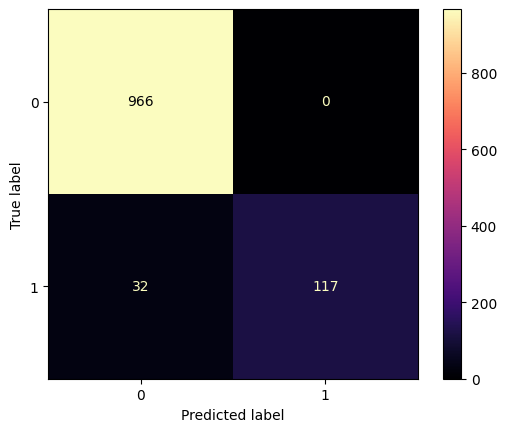

In [32]:
sns.reset_orig()

# Create a Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    labels=clf.classes_,
    cmap='magma',
)

# Show the Confusion Matrix
plt.show()


In [33]:
print(classification_report(y_test, y_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

